/var/folders/17/fln2vvvs40l9b1dy3hm9tq680000gn/T/ipykernel_27350/936204549.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['class'].replace(class_mapping)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.9598319029897976, 0.9598319029897976, 0.9664818612187034, 0.9664818612187034, 0.9661728917348785, 0.9799498746867169, 0.9799498746867169, 0.9799498746867169, 0.973165236323131, 0.9866332497911445, 0.9866332497911445, 0.9866332497911445, 0.9799498746867169, 0.973165236323131, 0.973165236323131, 0.973165236323131, 0.973165236323131, 0.973165236323131, 0.973165236323131, 0.973165236323131]


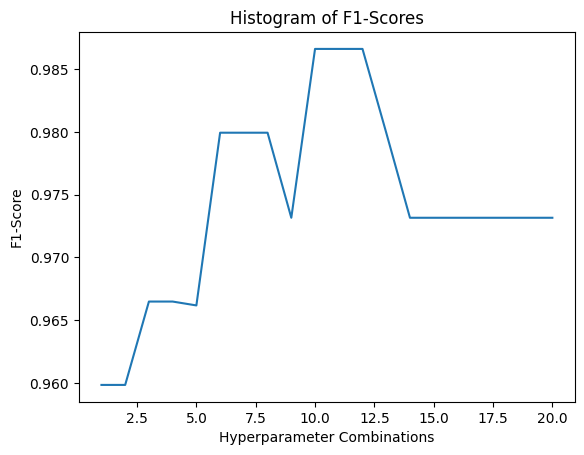

In [112]:
import numpy as np
import csv
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
        
 
# Paramètres à explorer
param_grid = {
    'n_neighbors': np.arange(1, 9),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# open the csv file
df = pd.read_csv('./iris.csv') 

#load the dataset from sklearn
#iris = load_iris()
# X = iris.data
#y = iris.target
#print(y)

# load the X value from the dateset
columns_to_extract = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df[columns_to_extract].values;

# Map class names to numerical values
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Replace 'class' values with numerical values
y = df['class'].replace(class_mapping)


#model 
model = KNeighborsClassifier()

# Performing the grid search
grid_search = GridSearchCV(
    model,
    param_grid,
    scoring="f1_macro"
)

# Training the model
grid_search.fit(X, y)

#get the best params and 
# best_params = grid_search.best_params_
# f1_macro = grid_search.best_score_

neighbors_values = []
f1_macro_scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance", metric='euclidean')
    f1_macro_score = np.mean(cross_val_score(knn, X, y, scoring='f1_macro'))

    # Store results
    neighbors_values.append(i)
    f1_macro_scores.append(f1_macro_score)

print(neighbors_values)
print(f1_macro_scores) 

# Extract F1-scores
f1_scores = grid_search.cv_results_['mean_test_score']

# Plot histogram
plt.plot(neighbors_values, f1_macro_scores)
plt.xlabel('neighbors_values')
plt.ylabel('F1-Score')
plt.title('Histogram of F1-Scores')
plt.show()

 
